# Building and Using a FinDiscountCurve

Build a curve object directly from a vector of times and discount factors

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.utils import *
from financepy.market.curves import *

####################################################################
# FINANCEPY BETA Version 0.191 - This build:  17 Jan 2021 at 14:09 #
#      This software is distributed FREE & WITHOUT ANY WARRANTY    #
# For info and disclaimer - https://github.com/domokane/FinancePy  #
#      Send any bug reports or comments to quant@financepy.com     #
####################################################################



## Building the Discount Curve

Set the start date that anchors the curve

In [3]:
start_date = Date(1, 1, 2018)

Set a vector of times out to 10 years

In [4]:
times = np.linspace(0, 10.0, 5)

In [5]:
dates = start_date.addYears(times)

In [6]:
print(dates)

[01-JAN-2018, 01-JUL-2020, 01-JAN-2023, 01-JUL-2025, 01-JAN-2028]


Now generate the vector of discount factors at a continuous rate of 5%

In [7]:
rates = np.zeros(5)
rates[0] = 0.0475
rates[1] = 0.0500
rates[2] = 0.0525
rates[3] = 0.0550
rates[4] = 0.0575
dfs = np.exp(-rates * times)

We now construct the Discount Curve

In [8]:
curve = FinDiscountCurve(start_date,dates,dfs,FinInterpTypes.FLAT_FWD_RATES)

Let's just check that we can refit the discount factors provided

In [9]:
print(curve)

OBJECT TYPE: FinDiscountCurve
DATES: DISCOUNT FACTORS
 01-JAN-2018:   1.00000000
 01-JUL-2020:   0.88249690
 01-JAN-2023:   0.76912636
 01-JUL-2025:   0.66199320
 01-JAN-2028:   0.56270487



## Calculating Instantaneous Forward Rates

First look at monthly time steps

In [10]:
years = np.linspace(0,10,121)
dates = start_date.addYears(years)
fwds = curve.fwd(dates)

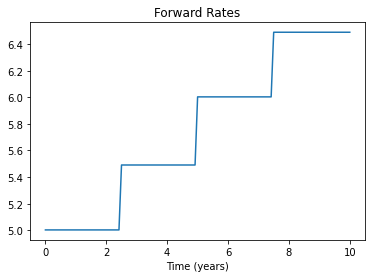

In [11]:
plt.title("Forward Rates")
plt.xlabel("Time (years)")
plt.plot(years, fwds*100);

We see that these are piecewise flat as the interpolation imposes.

## Money Market Forward Rates

In [31]:
years = np.linspace(0,10,121)
start_dates = start_date.addYears(years)
tenor = "3M"
fwds = curve.fwd_rate(dates, tenor)

In [32]:
type(fwds), type(years)

(numpy.ndarray, numpy.ndarray)

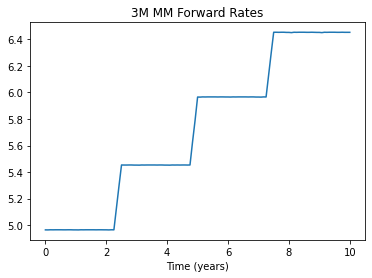

In [33]:
plt.title("3M MM Forward Rates")
plt.xlabel("Time (years)")
plt.plot(years, fwds*100);

## Calculating Swap Rates

In [44]:
swap_rates = curve.swap_rate(start_date.addDays(0), dates)

Text(0.5, 1.0, 'Swap Rates')

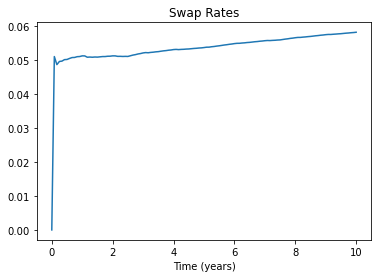

In [45]:
plt.xlabel("Time (years)")
plt.plot(years, swap_rates);
plt.title("Swap Rates")

TODO: REVISIT AND CHECK

Copyright (c) 2020 Dominic O'Kane